In [1]:
# Prep and read data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='ticks',font_scale=1.75)
from datetime import datetime
import statsmodels.api as sm
from scipy.stats import norm, expon

def dailyAvg(data,windowsize):
    data = np.array(data)
    data = data[0:windowsize*int(len(data)/windowsize)]
    return np.nanmean(np.reshape(data,[int(len(data)/windowsize),windowsize]),axis=1)

df = pd.read_csv('../Data/US-MMS_short.csv')
print(df.head())

dP = dailyAvg(df['P'],24)*24 # mm/day
dLAI = dailyAvg(df['LAI'],24)
dNEE = -dailyAvg(df['NEE'],24)

   YEAR  MONTH  DAY  HOUR     TA    PA    P    WS     RH   SWC      G  \
0  2003      1    1     1  2.002  97.4  0.1  4.24  83.63  47.0 -4.632   
1  2003      1    1     2  1.205  97.3  0.8  4.63  91.97  47.0 -5.075   
2  2003      1    1     3  0.836  97.2  0.7  5.45  92.56  47.0 -5.945   
3  2003      1    1     4  0.632  97.2  0.8  5.21  92.76  48.0 -6.730   
4  2003      1    1     5  0.326  97.1  0.9  5.02  95.70  49.0 -7.337   

         LE        H       NEE  GPP  USTAR  SW_NET  LW_NET       LAI        GA  
0  3.321300 -39.9312  0.662678  0.0  0.668   0.419     1.4  0.489881  5.539262  
1  5.979780 -66.9933  1.156150  0.0  0.688   0.927     1.8  0.489860  5.492919  
2 -4.503500 -71.0931  0.567972  0.0  0.848   0.910     3.2  0.489840  7.289668  
3  0.394589 -75.0968  0.443852  0.0  0.793   1.036     2.6  0.489819  6.646328  
4 -1.880010 -51.4169  0.500611  0.0  0.785   0.393     2.0  0.489799  6.811513  


(1.0, 3.8690476190476186)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42] [2.58461538e-01 1.99594011e-01 1.54134226e-01 1.19028419e-01
 9.19183554e-02 7.09829142e-02 5.48157557e-02 4.23308496e-02
 3.26895217e-02 2.52441147e-02 1.94944832e-02 1.50543950e-02
 1.16255869e-02 8.97772847e-03 6.93294965e-03 5.35389224e-03
 4.13448296e-03 3.19280788e-03 2.46560991e-03 1.90403947e-03
 1.47037302e-03 1.13547900e-03 8.76860863e-04 6.77145921e-04
 5.22918307e-04 4.03817770e-04 3.11843723e-04 2.40817801e-04
 1.85968833e-04 1.43612336e-04 1.10903008e-04 8.56435985e-05
 6.61373039e-05 5.10737877e-05 3.94411571e-05 3.04579891e-05
 2.35208389e-05 1.81637028e-05 1.40267148e-05 1.08319725e-05
 8.36486868e-06 6.45967559e-06]


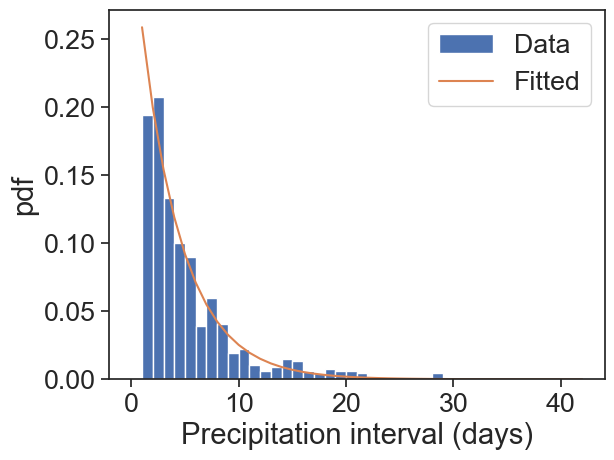

In [17]:
# Exercise 1: Estiamte the 95% confidence interval of the average precipitation interval 
# using parametric bootstrapping

Pday = np.where(dP>1)[0] # index of rainy days
# print(Pday)
Pitv = np.diff(Pday) # interval of rainy days
# print(Pitv)
Pitv = Pitv[Pitv>1]-1 # select only the intervals greater than 1 (i.e. noncontinuous precipitation)

# print(np.mean(Pitv))

# 1. Plot a histogram of precipitation intervals Pitv
plt.figure()
plt.hist(Pitv,bins=np.arange(0,30,1),density=True,label='Data')

# 2. Fit an exponential distribution from Pitv using expon.fit() and plot the fitted pdf
p = expon.fit(Pitv)
print(p)


bins = np.arange(min(Pitv),max(Pitv),1)
expon_pdf = expon.pdf(bins,*p)
# print(bins,expon_pdf)
plt.plot(bins,expon_pdf,label='Fitted')
plt.xlabel('Precipitation interval (days)')
plt.ylabel('pdf')
plt.legend()



4.853314539861431


(array([ 82., 141.,  88.,  87.,  56.,  58.,  39.,  24.,  19.,  20.,  18.,
          7.,   7.,   4.,   9.,   1.,   4.,   2.,   3.,   0.,   1.,   0.,
          1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5]),
 <BarContainer object of 43 artists>)

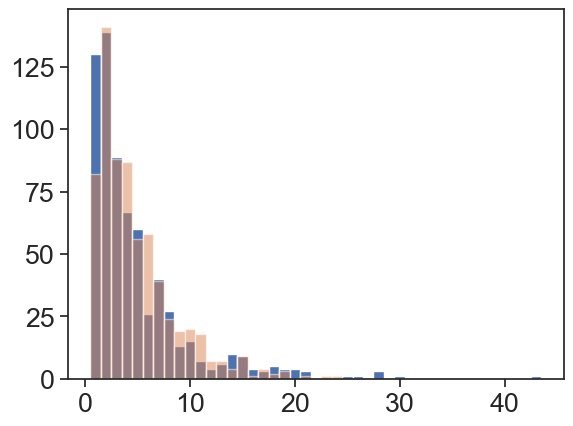

In [42]:
# 3. Based on the fitted distribuiton parameter, simulate an array of precipitation intervals using expon.rvs()
#    To make sure the simulated data is close to the observations, compare the histograms 

# np.random.seed(seed=1)

Pitv_sim = expon.rvs(*p,len(Pitv))
print(np.mean(Pitv_sim))
plt.hist(Pitv,bins = np.arange(0.5,max(Pitv)+1,1))
plt.hist(Pitv_sim,bins = np.arange(0.5,max(Pitv)+1,1),alpha=0.5)


In [29]:
# 4. Simulate 100 sets of precipitation intervals by repeating the above. 
#    Calculate and record the mean of each set

M = 100
Pitv_mean = np.zeros([M,])

for i in range(M):
    Pitv_sim = expon.rvs(*p,len(Pitv))
    Pitv_mean[i,] = np.mean(Pitv_sim)


    

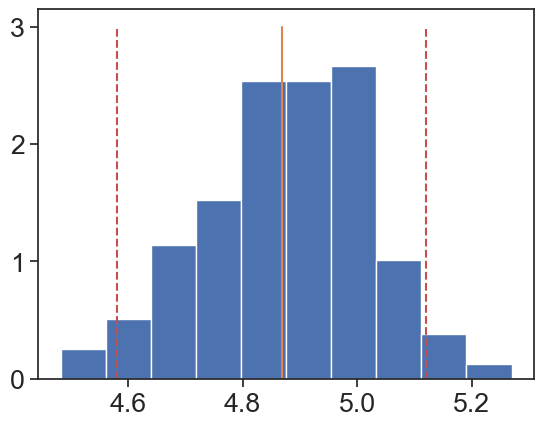

In [37]:
# 5. Plot the histogram of average precipitation interval across the samples, compare to the mean from observation

plt.hist(Pitv_mean,density=True)
plt.plot(np.mean(Pitv)*np.array([1,1]),[0,3])

# 6. Calculate the 2.5% and 97.5% quantiles using np.quantile()
CI = [np.quantile(Pitv_mean,0.025),np.quantile(Pitv_mean,0.975)]

plt.plot(CI[0]*np.array([1,1]),[0,3],'--r')
plt.plot(CI[1]*np.array([1,1]),[0,3],'--r')



In [51]:
# Exercise 2: Estimate the uncertainty of standard deviation using nonparametric bootstrapping

np.random.seed(1) # set the random seed so that the generated array A (observation) stays the same
A = np.random.randint(10, size=20)
print(A)

# 7. Calculate the standard deviation of A
A_std = np.std(A)
print(A_std)

# 8. Generate a resampled array named A_resample with the same length as A by randomly choosing elements
#    in A with replacement using the function np.random.choice(). 
A_resample = np.random.choice(A,replace=True,size=len(A))
print(A_resample)
print(np.std(A_resample))




[5 8 9 5 0 0 1 7 6 9 2 4 5 2 4 2 4 7 7 9]
2.874021572639983
[7 5 2 9 9 7 8 5 7 6 2 9 2 2 6 7 5 1 7 5]
2.4994999499899975


2.874021572639983
[2.059912635786496, 3.2919040064422367]


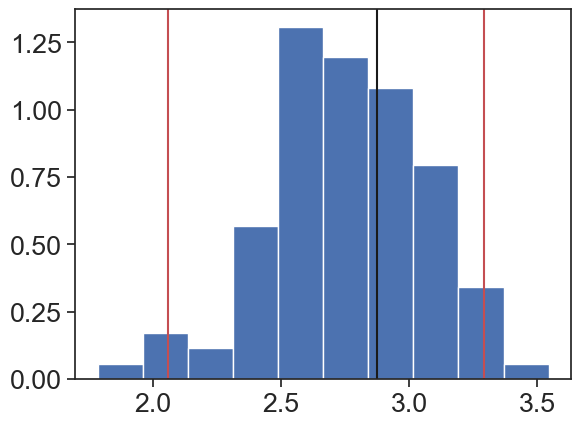

In [59]:
# 9. Repeat the resampling for 100 times, record the standard deviation of each sample  
M = 100
A_resample_std = np.zeros([M,])

for i in range(M):
    A_resample_std[i] = np.std(np.random.choice(A,replace=True,size=len(A)))


# 10. Plot the histogram of A_resample_std and calculate the 95% confidence interval
plt.hist(A_resample_std,density=True)
CI = [np.quantile(A_resample_std,0.025),np.quantile(A_resample_std,0.975)]
plt.axvline(np.std(A),color='k')
plt.axvline(CI[0],color='r')
plt.axvline(CI[1],color='r')
print(np.std(A))
print(CI)


[-2.62323546  1.5077857 ]
[[-2.73072123 -2.51574969]
 [ 1.47134385  1.54422756]]
0.6003586976929607


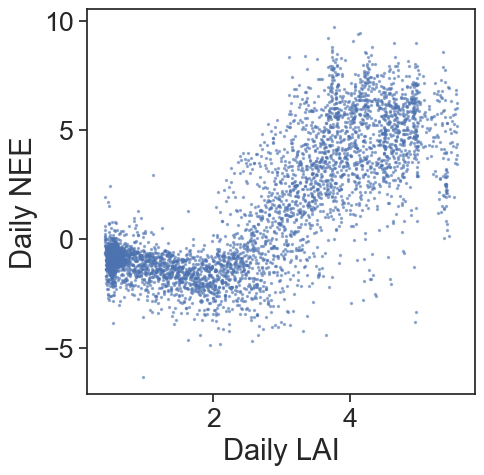

In [71]:
# Exercise 3. Use nonparametric bootstrapping to estimate uncertainty of regression coefficients and model accuracy
plt.figure(figsize=(5,5))
plt.scatter(dLAI,dNEE,s=2,alpha=0.5)
plt.xlabel('Daily LAI');plt.ylabel('Daily NEE')

# 11. Recap: set up a simple linear regression model using dLAI to explain dNEE. Name the model as model1. 

y = dNEE.copy()
x = sm.add_constant(dLAI)
model1 = sm.OLS(y,x).fit()
print(model1.summary())

# 12. Extract the regression coefficients, t-test based conficence intervals and R2 using
#     model1.params, model1.conf_int, and model1.rsquared

print(model1.params)
print(model1.conf_int())
print(model1.rsquared)




In [74]:
# 13. Resample x and y by randomly choosing N indices ranging from 0 to N, using np.random.choice()

N = len(y)
idx_range = np.arange(0,N)

idx = np.random.choice(idx_range, N, replace=True)
print(idx)

# 14. Get the resampled y_resample and x_resample based on the array of idx

y_resample = y[idx]
x_resample = x[idx,:]


[2217 3492  319 ...  572 3974 3293]


In [79]:
# 15. Rerun the regression using x_resample and y_resample. Extract the coefficiencts and R2. 

model1 = sm.OLS(y_resample,x_resample).fit()
b0,b1 = model1.params
r2 = model1.rsquared
print(r2,b0,b1)


0.6057297636173575 -2.5265323285255095 1.482413495237452


In [80]:
# 16. Repeat steps 13 to 15 for 1000 times. Record the coefficients and R2 for each sample
M = 1000
N = len(y)
idx_range = np.arange(0,N)

# Initializing the arrays to store using the following:
B0 = np.zeros([M,])
B1 = np.zeros([M,])
R2 = np.zeros([M,])

for i in range(M):
    idx = np.random.choice(idx_range, N, replace=True)
    y_resample = y[idx]
    x_resample = x[idx,:]
    model1 = sm.OLS(y_resample,x_resample).fit()
    B0[i],B1[i] = model1.params
    R2[i] = model1.rsquared


[-2.696302170472728, -2.5419624022734193]
[1.4705826574006664, 1.5386903198446649]
[0.583636445902731, 0.6166444683387595]


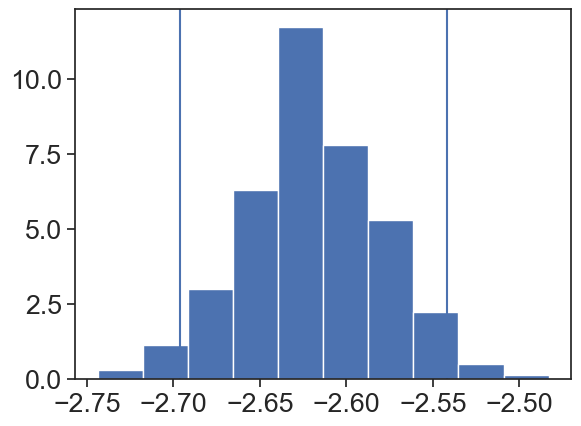

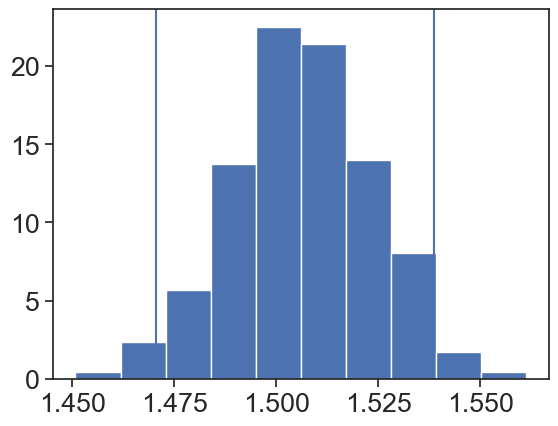

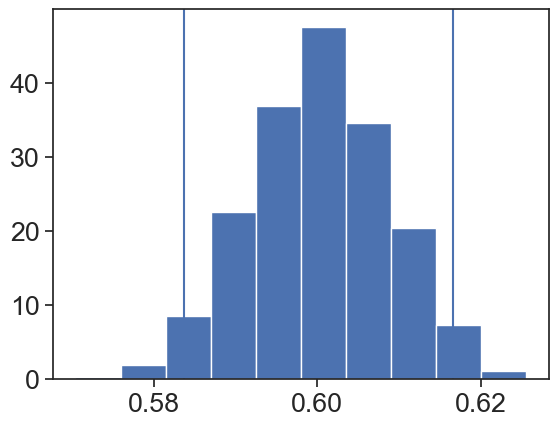

In [83]:
# 17. Visualize the distribution of B0, B1, and R2 using histograms. 
#     Compare those to the values derived from the original data. 
plt.figure()
plt.hist(B0,density=True)
CI_B0 = [np.quantile(B0,0.025),np.quantile(B0,0.975)]
plt.axvline(CI_B0[0])
plt.axvline(CI_B0[1])
print(CI_B0)

plt.figure()
plt.hist(B1,density=True)
CI_B1 = [np.quantile(B1,0.025),np.quantile(B1,0.975)]
plt.axvline(CI_B1[0])
plt.axvline(CI_B1[1])
print(CI_B1)

plt.figure()
plt.hist(R2,density=True)
CI_R2 = [np.quantile(R2,0.025),np.quantile(R2,0.975)]
plt.axvline(CI_R2[0])
plt.axvline(CI_R2[1])
print(CI_R2)


# 18. Calculate the 95% confidence intervals of B0, B1, and R2




In [13]:
# 19. Use parametric bootstrapping to estimate uncertainty of regression coefficients and model accuracy 
#    (Similar to assignment)

# Calculate resildual and standard deviation of resildual

# Simulate data using the linear model 

# Rerun regression using simulated data

# Repeat for 1000 times and record the results

# Visualize the results
